<h2>Why Audio Features?</h2>

<ul>
  <li><strong>Description of Sound:</strong>  
    Audio features provide a structured and quantitative representation of sound. Raw audio signals are complex waveforms that are hard to interpret directly. Features simplify this by extracting meaningful information, such as pitch, timbre, loudness, and rhythm.
  </li>

  <li><strong>Different Features Capture Different Aspects of Sound:</strong>  
    Various features describe distinct properties of audio:
    <ul>
      <li><em>Temporal Features</em> (e.g., zero-crossing rate) describe how the signal changes over time.</li>
      <li><em>Spectral Features</em> (e.g., spectral centroid, bandwidth) reveal frequency-related information.</li>
      <li><em>Perceptual Features</em> (e.g., MFCCs, chroma) relate to how humans perceive sound.</li>
    </ul>
    Combining different types of features gives a richer and more complete understanding of audio signals.
  </li>

  <li><strong>Build Intelligent Audio Systems:</strong>  
    Audio features are the foundation for building systems that understand or generate sound. They are used in:
    <ul>
      <li>Speech recognition and synthesis</li>
      <li>Music recommendation and classification</li>
      <li>Environmental sound recognition</li>
      <li>Emotion detection from voice</li>
      <li>Audio-based surveillance and forensics</li>
    </ul>
  </li>
</ul>


<hr>
<h2>Audio Feature Categorization</h2>

<ul>
  <li><strong>Level of Abstraction:</strong>
    <ul>
      <li><em>Low-level features:</em> Directly extracted from the waveform (e.g., energy, zero-crossing rate).</li>
      <li><em>Mid-level features:</em> Derived from signal processing or perceptual models (e.g., MFCCs, pitch, spectral centroid).</li>
      <li><em>High-level features:</em> Semantic or cognitive descriptors (e.g., genre, emotion, instrument type).</li>
    </ul>
  </li>

  <li><strong>Temporal Scope:</strong>
    <ul>
      <li><em>Frame-based:</em> Extracted over short windows (e.g., 20–40 ms), capturing local information.</li>
      <li><em>Segment-level:</em> Extracted over longer durations like phonemes or musical notes.</li>
      <li><em>Global features:</em> Summarize entire audio clips (e.g., mean MFCCs, overall tempo).</li>
    </ul>
  </li>

  <li><strong>Music Aspect:</strong>
    <ul>
      <li><em>Rhythm-related:</em> Tempo, onset rate, beat histogram.</li>
      <li><em>Pitch-related:</em> Fundamental frequency (F0), chroma, melody.</li>
      <li><em>Timbre-related:</em> Spectral centroid, MFCCs, spectral roll-off.</li>
      <li><em>Dynamics-related:</em> Loudness, dynamic range.</li>
    </ul>
  </li>

  <li><strong>Signal Domain:</strong>
    <ul>
      <li><em>Time-domain:</em> Zero-crossing rate, waveform shape, energy.</li>
      <li><em>Frequency-domain:</em> Spectral centroid, spectral bandwidth, FFT.</li>
      <li><em>Cepstral-domain:</em> MFCCs (Mel-Frequency Cepstral Coefficients), LPCCs.</li>
    </ul>
  </li>

  <li><strong>Machine Learning Approach:</strong>
    <ul>
      <li><em>Handcrafted features:</em> Manually designed based on signal knowledge (e.g., MFCC, pitch).</li>
      <li><em>Learned features:</em> Extracted automatically from data using models (e.g., deep CNN features from spectrograms).</li>
    </ul>
  </li>
</ul>
<hr>

<h3>Level of Abstraction</h3>
<img src="../images/level_of_abstraction.png">
<hr>

<h2>Temporal Scope of Audio Features</h2>

<ul>
  <li><strong>Instantaneous (~50 ms):</strong>  
    Features extracted over very short time windows (typically 20–50 milliseconds).  
    <ul>
      <li>Capture rapid, local changes in the signal</li>
      <li>Examples: Zero-Crossing Rate, Short-Time Energy, Spectral Centroid, MFCCs (per frame)</li>
      <li>Used in speech phoneme analysis, real-time audio processing</li>
    </ul>
  </li>

  <li><strong>Segment-level (seconds):</strong>  
    Features computed over medium-length segments (e.g., syllables, musical notes, or sound events).  
    <ul>
      <li>Capture mid-term patterns and transitions</li>
      <li>Examples: Onset rate, pitch contour, tempo, note duration</li>
      <li>Useful in music analysis, speech prosody, sound event detection</li>
    </ul>
  </li>

  <li><strong>Global:</strong>  
    Features aggregated over the entire audio clip or file.  
    <ul>
      <li>Capture the overall structure and character of the audio</li>
      <li>Examples: Mean and variance of MFCCs, overall loudness, genre classification features</li>
      <li>Used in music genre detection, speaker identification, emotion classification</li>
    </ul>
  </li>
</ul>
<hr>

<h2>Zero-Crossing Rate (ZCR)</h2>

<p><strong>Definition:</strong> The rate at which the audio signal changes sign (from positive to negative or vice versa).</p>

<ul>
  <li><strong>High ZCR:</strong> Indicates noisy or percussive sounds (e.g., snare drum, 's' sounds).</li>
  <li><strong>Low ZCR:</strong> Indicates tonal or voiced sounds (e.g., vowels, sustained notes).</li>
</ul>

<p><strong>Use cases:</strong> Speech/music classification, instrument recognition, and signal texture analysis.</p>

---- 

avg_zcr < 0.05 → likely a harmonic or voiced sound.

avg_zcr > 0.1 → likely a noisy or unvoiced/percussive sound.

In [32]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

from IPython.display import Audio

y, sr = librosa.load(librosa.ex('trumpet'), duration=2.0)  # Load first 2 seconds

zcr = librosa.feature.zero_crossing_rate(y)[0]
avg_zcr = np.mean(zcr)

print(f"Average Zero-Crossing Rate: {avg_zcr:.4f}")
Audio(y, rate=sr)

Average Zero-Crossing Rate: 0.0996


In [33]:
# Noisy audio data
sr = 22050
duration = 2.0
samples = int(duration * sr)
noise = np.random.randn(samples)  # white noise

zcr_noise = librosa.feature.zero_crossing_rate(noise)[0]
avg_zcr_noise = np.mean(zcr_noise)
print(f"Average Zero-Crossing Rate (White Noise): {avg_zcr_noise:.4f}")
Audio(noise, rate=sr)

Average Zero-Crossing Rate (White Noise): 0.4900


<hr>
<h2>Short-Time Energy (STE)</h2>

<p><strong>Definition:</strong> Measures the signal’s power (loudness) within a short frame by summing squared amplitudes.</p>

<h3>Formula:</h3>

$$
E[m] = \sum_{n=0}^{N-1} x_m[n]^2
$$

- $E[m]$: Short-time energy of the $m$-th frame  
- $x_m[n]$: The $n$-th sample in the $m$-th frame  
- $N$: Frame length (number of samples per frame)

---

<h3>Interpretation:</h3>

<b>Peaks in STE</b> → likely sound onsets (the start of a new sound) or loud events (e.g., drum hit, vowel sound, clap, explosion).

<b>Troughs in STE</b> → quiet or silent regions.

<p><strong>Use cases:</strong> Voice activity detection, speech/music segmentation, onset detection, emotion analysis.</p>

---

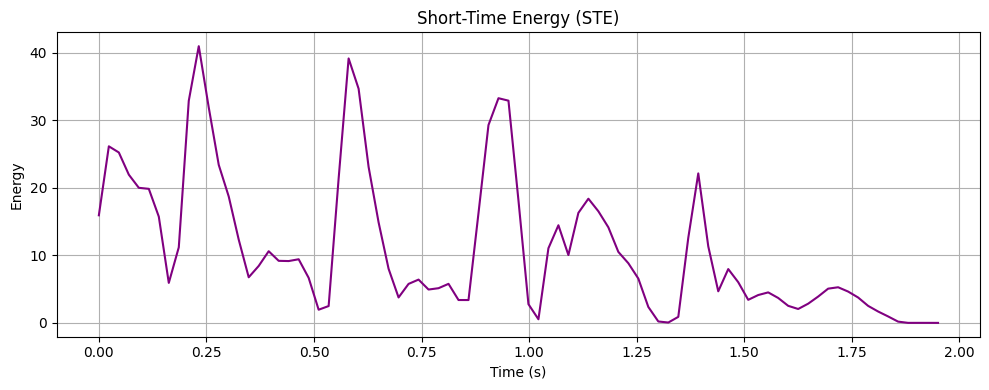

In [34]:
y, sr = librosa.load(librosa.ex('trumpet'), duration=2.0)

frame_length = 1024 # Think of it as kernel_size
hop_length = 512    # and this as stride

# Compute Short-Time Energy
energy = np.array([
    np.sum(np.square(y[i:i+frame_length]))
    for i in range(0, len(y) - frame_length, hop_length)
])

# Time axis for energy
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

plt.figure(figsize=(10, 4))
plt.plot(t, energy, color='purple')
plt.title('Short-Time Energy (STE)')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.grid(True)
plt.tight_layout()
plt.show()
Audio(y, rate=sr)

## Spectral Centroid

The **Spectral Centroid** represents the "center of mass" of the frequency spectrum of a sound. It gives an idea of where most of the frequency energy is concentrated.


### Interpretation

- A **higher** spectral centroid indicates a **brighter or sharper** sound (more high-frequency content).
- A **lower** spectral centroid indicates a **darker or duller** sound (more low-frequency content).

---

### Formula

$$
\text{Spectral Centroid} = \frac{\sum_{k=0}^{N-1} f(k) \cdot |X(k)|}{\sum_{k=0}^{N-1} |X(k)|}
$$

<ul>
  <li><b>\( f(k) \)</b>: Frequency at bin \( k \)</li>
  <li><b>\( |X(k)| \)</b>: Magnitude of the Fourier Transform at bin \( k \)</li>
  <li><b>\( N \)</b>: Number of frequency bins</li>
</ul>


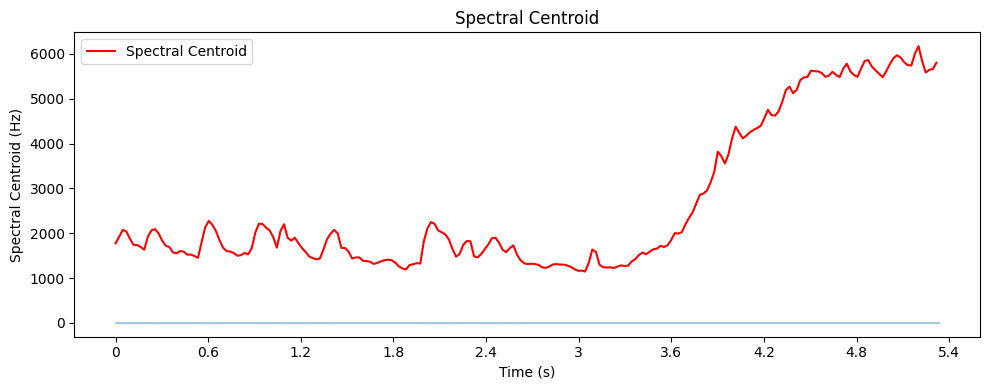

In [37]:
y, sr = librosa.load(librosa.ex('trumpet'))

# Compute spectral centroid
centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Time variable for plotting
frames = range(len(centroids))
t = librosa.frames_to_time(frames)

# Plot waveform and centroid
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, centroids, color='r', label='Spectral Centroid')
plt.title('Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Centroid (Hz)')
plt.legend()
plt.tight_layout()
plt.show()
Audio(y, rate=sr)

--- 

<h2>Frame Length and Hop Length</h2>

<h3>Frame Length</h3>
<p>
  <strong>Definition:</strong> Number of audio samples in each analysis window.<br>
  It determines how much audio is analyzed at once.
</p>
<ul>
  <li>If <code>sr = 22050 Hz</code> and <code>frame_length = 1024</code>, then the frame spans about 46 ms of audio.</li>
  <li>Common values: 512, 1024, 2048 (depending on desired time vs frequency resolution).</li>
</ul>
<hr>
<h3>Hop Length</h3>
<p>
  <strong>Definition:</strong> Number of samples between the starts of consecutive frames.<br>
  It controls how much the window moves forward (i.e., frame overlap).
</p>
<ul>
  <li>If <code>hop_length = 512</code> and <code>frame_length = 1024</code>, there's 50% overlap between frames.</li>
  <li>Smaller hop length → smoother and more detailed analysis (but more computation).</li>
</ul>
<hr>
<h3>Visual Example</h3>
<pre>
Frame 1:  |-------------|
Frame 2:      |-------------|
Frame 3:          |-------------|
        ↑
     hop_length
</pre>
<hr>
<h3>Trade-Offs</h3>
<table border="1" cellpadding="5">
  <tr>
    <th>Parameter</th>
    <th>Small Value</th>
    <th>Large Value</th>
  </tr>
  <tr>
    <td><strong>frame_length</strong></td>
    <td>Better time resolution</td>
    <td>Better frequency resolution</td>
  </tr>
  <tr>
    <td><strong>hop_length</strong></td>
    <td>Smoother output (more overlap)</td>
    <td>Faster computation (less overlap)</td>
  </tr>
</table>


<hr>
<h2>What are MFCCs (Mel-frequency cepstral coefficients)?</h2>

<b>MFCCs</b> represent the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a Mel scale of frequency.

<b>They are widely used for:</b>
- Speech recognition
- Speaker identification
- Music genre classification
- Audio similarity analysis

<b>Computation Steps:</b>
1. Pre-emphasis (optional)
2. Framing the audio signal
3. Windowing each frame
4. FFT → get spectrum
5. Mel Filterbank → apply triangular filters on a Mel scale
6. Log of energies
7. DCT (Discrete Cosine Transform) to decorrelate


The result is a set of coefficients:
$$
\text{MFCC}_n = \sum_{k=1}^{K} \log(S_k) \cdot \cos\left[n \cdot \left(k - \frac{1}{2}\right) \cdot \frac{\pi}{K}\right]
$$

Where:
- \( S_k \): Mel-scaled log power at bin \( k \)
- \( n \): MFCC index
- \( K \): Number of Mel bands


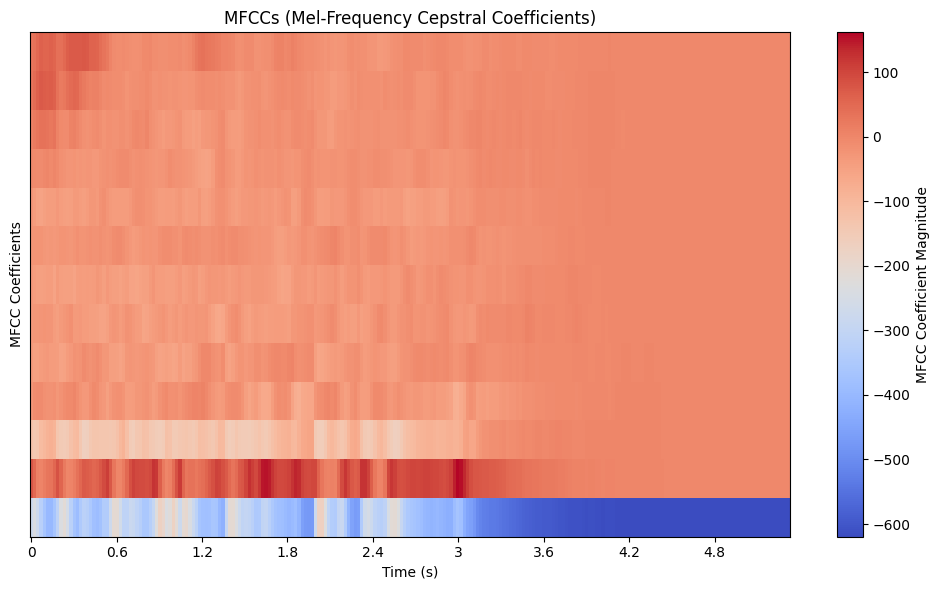

In [38]:
y, sr = librosa.load(librosa.ex('trumpet'))

# Compute MFCCs (13 is typical)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(label='MFCC Coefficient Magnitude')
plt.title('MFCCs (Mel-Frequency Cepstral Coefficients)')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

<hr>
<h2>Music Aspects in Audio Features</h2>

<ul>
  <li><strong>Beat:</strong>
    <ul>
      <li>Represents the temporal regularity or pulse of the music.</li>
      <li>Features: Tempo, onset detection, beat histogram, inter-onset intervals.</li>
      <li>Used for: Beat tracking, tempo estimation, rhythm pattern recognition.</li>
    </ul>
  </li>

  <li><strong>Timbre:</strong>
    <ul>
      <li>Describes the tone color or quality of a sound that distinguishes different instruments or voices.</li>
      <li>Features: MFCCs (Mel-Frequency Cepstral Coefficients), Spectral Centroid, Spectral Bandwidth, Spectral Contrast.</li>
      <li>Used for: Instrument recognition, sound classification, music texture analysis.</li>
    </ul>
  </li>

  <li><strong>Pitch:</strong>
    <ul>
      <li>Refers to the perceived frequency of a sound (i.e., how high or low it is).</li>
      <li>Features: Fundamental frequency (F0), pitch contour, chroma features.</li>
      <li>Used for: Melody extraction, tuning detection, pitch tracking, speech intonation.</li>
    </ul>
  </li>

  <li><strong>Harmony:</strong>
    <ul>
      <li>Describes the combination of simultaneous musical notes and their relationships.</li>
      <li>Features: Chroma vectors, chord recognition, key estimation.</li>
      <li>Used for: Chord progression analysis, harmonic content detection, key and scale detection.</li>
    </ul>
  </li>
</ul>


<hr>

## Signal Domain

- **Time Domain**
  - **Amplitude Envelope**: Shows how the amplitude of a signal evolves over time.
  - **Root-Mean-Square (RMS) Energy**: a measure of sound intensity
  - **Zero Crossing Rate (ZCR)**: Counts how frequently the signal crosses the zero amplitude line.

<hr>

## Frequency Domain
  - **Band Energy Ratio**: Measures the energy distribution across specific frequency bands.
  - **Spectral Centroid**: Indicates the "center of mass" of the spectrum; often perceived as the brightness of the sound.
  - **Spectral Flux**: Measures how quickly the power spectrum changes between consecutive frames.

<hr>

## Time-Frequency Representation

Combines both time and frequency information.

  - **Spectrogram**: Visualizes how the frequency content evolves over time.
  - **Mel-Spectrogram**: Spectrogram mapped onto the Mel scale (closer to human hearing).
  - **Constant-Q Transform (CQT)**: Uses logarithmically spaced frequency bins; useful for music/audio with harmonic content.
<hr>
<img src="../images/signal_domain.png">

<hr>
<img src="../images/traditional_ml.png">
<hr>
<img src="../images/deep_nn.png">
<hr>
<img src="../images/types_of_intelligent.png">